# Species distribution model for litoria fallax
_______________________________________

## 1. 🌏Understanding the context

The model's goal is to forecast the presence of **Liroria fallax** in Australia. This is important because frogs are a good indicator of whether or not an ecosystem is healthy. Frog-free zones are considered unhealthy and unsuitable for thriving ecosystems. Furthermore, these models could be used to forecast potential habitat loss due to climate change, as well as to provide technical assistance to local environmental organisations.


<center>
<img src="https://github.com/EY-Data-Science-Program/2022-Better-Working-World-Data-Challenge/blob/accc61893f829d5dffdce0a2763234ddb8f42766/notebooks/level_1_challenge/pictures/Litoria_fallax.jpg?raw=1" width="500" height="340">
</center>

### Litoria fallax profile:
* Small frogs (2.5 cm).
* It usually lives in coasts and adjacent areas from northern QLD to southern NSW. The extension of its habitat is around 297,700 km.
* Eggs are laid in vegetation near water bodies (swamps, ponds, wetlands and dams). It can also be found in urban areas.
* Breeding starts in summer (Dec-Feb).
* In terms of extinction risk, it is considered as a Least Concern specie. Potential threats are loss habitat and habitat degradation.

#### Factors that can impact their precense:
* Minimum temperature of the coldest quarter, mean temperature of the warmest quarter, precipitation of warmest quarter, and min. relative humidity [*Persistence of the Eastern Dwarf Tree Frog (Litoria fallax) in Melbourne: habitat characteristics and climatic niche*](https://minerva-access.unimelb.edu.au/items/3e119c3e-631b-5f99-8b83-bac728f4722b)
* Mean temperature of the warmest quarter, average precipitation of warmest quarter [*Environmental and spatial variables influence the composition of frog assemblages in sub-tropical eastern Australia*](https://onlinelibrary.wiley.com/doi/10.1111/j.0906-7590.2004.03711.x)
* Water bodies, depth and ph. [*Environmental variables associated with the distribution and occupancy of habitat specialist tadpoles in naturally acidic, oligotrophic waterbodies*](https://onlinelibrary.wiley.com/doi/10.1111/aec.12048)
* Water body sizes, surface vegetaion, precense of gabusia, landscape context, and habitat structure (vegetation coverage, bareground, grassland and shrubland). [*The relative importance of aquatic and terrestrial variables for frogs in an urbanizing landscape: Key insights for sustainable urban development*](https://linkinghub.elsevier.com/retrieve/pii/S0169204616301128)

*References: [Atlas of living Australia](https://bie.ala.org.au/species/urn:lsid:biodiversity.org.au:afd.taxon:d33f5b1c-df22-42ea-9347-58f229a53054)*

### Aim and Objectives:
Propose a machine learning model capable of predicting the existence of Litoria Fallax and detecting healthy ecosystems based on climate variables. The following are the objectives:
- [x] Obtain the species data
- [x] Generate pseudo-absence points and balance the species data
- [x] Select the features most relevant from the climate dataset
- [x] Obtain climate data for pseudo-absence points
- [x] Clean and prepare the data for ML modelling
- [x] Balancing data and getting X and y
- [ ] Train Ml models
- [ ] Evaluate and select the most accurate model
- [ ] Predict and communicate results based on the potentital future climate change scenarios

## 2. 🐸Species Data
The data to be collected will be the occurrence of Litoria Fallax between 2015 and 2019. Because the dataset is large enough for ML models, I will not collect additional data from different years.

In [1]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Math
import math

# Data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab
import scipy.stats as stats
import feature_engine.transformation as vt

# Import data
from ipynb.fs.defs.helper import (filter_bbox, get_frogs, plot_species, plot_barchart, get_terraclimate, create_target_variable, rebalance_data, 
                                  plot_unbalance_vs_unbalance, join_frogs, create_relation_plots, in_sample_out_sample_evaluation, evaluate_cross_KFold, predict_frogs,
                                 create_document_for_submission, plot_psabs_with_precense, correlation, diagnostic_plots, evaluate_cross_KFold_new, in_sample_out_sample_evaluation_X_y, plot_confusion_matrix)

# Geospatial
import contextily as cx
import xarray as xr
import zarr # Not referenced, but required for xarray

# Data Cleaning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV

# Machine Learning
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.calibration import calibration_curve
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

# Correlation
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile


# Visualization
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
from soilgrids import SoilGrids

data_path = './'
from sklearn.pipeline import Pipeline

In [2]:
#Import data
all_frog_data_complete = get_frogs(data_path+'/training_data/occurrence.txt', year_range=(2015, 2019))
df_australia = all_frog_data_complete[all_frog_data_complete['country']=='Australia']
df_australia = df_australia.dropna(axis=1)

In [3]:
df_australia

,gbifID,eventDate,country,continent,decimalLatitude,decimalLongitude,species
7,1944370584,2018-04-18 19:05:00,Australia,Australia,-33.693144,151.320884,Litoria Fallax
17,2423011701,2019-08-28 09:24:00,Australia,Australia,-33.925746,151.164082,Litoria Fallax
21,2236299662,2018-02-13 23:02:00,Australia,Australia,-31.732415,152.088515,Litoria Fallax
23,2563750401,2017-10-25 21:07:00,Australia,Australia,-32.968624,151.644194,Litoria Fallax
33,1850994254,2017-11-30 08:35:00,Australia,Australia,-33.093048,151.416300,Litoria Fallax
...,...,...,...,...,...,...,...
193707,2420099493,2016-09-17 00:00:00,Australia,Australia,-37.734715,144.328494,Crinia Signifera
193715,2420099296,2016-04-25 00:00:00,Australia,Australia,-37.861180,144.268865,Crinia Signifera
193719,2420099324,2016-09-17 00:00:00,Australia,Australia,-37.845236,144.354168,Crinia Signifera
193720,2420099687,2016-05-15 00:00:00,Australia,Australia,-38.176213,144.355254,Crinia Signifera


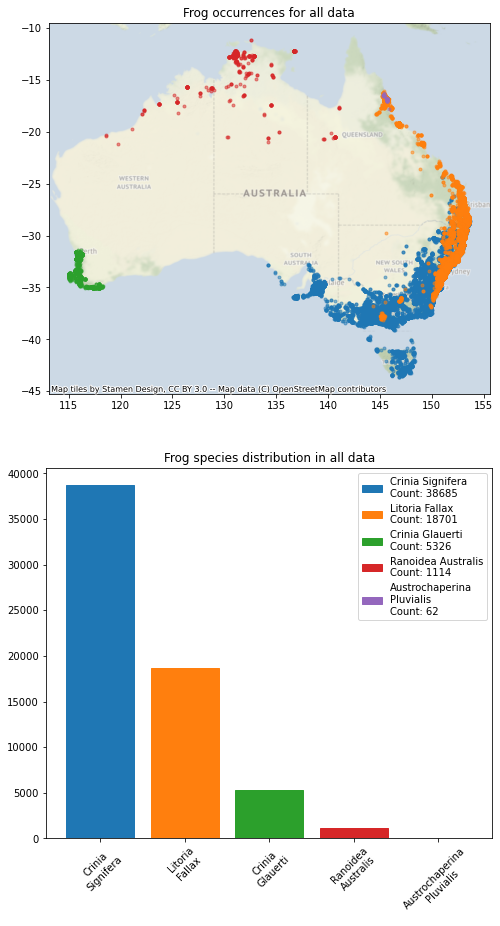

In [4]:
#Plot the data
fig, ax = plt.subplots(2, 1, figsize=(8, 15))
plot_species(fig, ax, df_australia, 'all data')

In [5]:
all_frog_data = create_target_variable(df_australia)

In [6]:
all_frog_data

,gbifID,eventDate,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus
7,1944370584,2018-04-18 19:05:00,Australia,Australia,-33.693144,151.320884,Litoria Fallax,1
17,2423011701,2019-08-28 09:24:00,Australia,Australia,-33.925746,151.164082,Litoria Fallax,1
21,2236299662,2018-02-13 23:02:00,Australia,Australia,-31.732415,152.088515,Litoria Fallax,1
23,2563750401,2017-10-25 21:07:00,Australia,Australia,-32.968624,151.644194,Litoria Fallax,1
33,1850994254,2017-11-30 08:35:00,Australia,Australia,-33.093048,151.416300,Litoria Fallax,1
...,...,...,...,...,...,...,...,...
193707,2420099493,2016-09-17 00:00:00,Australia,Australia,-37.734715,144.328494,Crinia Signifera,0
193715,2420099296,2016-04-25 00:00:00,Australia,Australia,-37.861180,144.268865,Crinia Signifera,0
193719,2420099324,2016-09-17 00:00:00,Australia,Australia,-37.845236,144.354168,Crinia Signifera,0
193720,2420099687,2016-05-15 00:00:00,Australia,Australia,-38.176213,144.355254,Crinia Signifera,0


## 3. 🕵Generation of pseudo-absence data
There is many techniques for generating pseudo-absence data points. The following are some of these ones with their adavantages and disadvantages:
- **True absence observations:** This is really hard becasue we do not have the data.
- **Pseudo-absences based on other frogs observations:** Although the observation of other frogs could cancel the sample bias, the models will be trained on areas where these other frogs were observed. This is a limitation because the final predictions will be not accurate in regions where no frogs (of any specie) were observed. Also, given that the resolution of TerraClimate is relatively coarse, it could occur that frogs of different species share the same habitat as Litori Fallax, which will make more difficult to the models the distinction of frogs.
- **Random selection(RS):** This will capture points of all the Australian region, which is good, but it wont concentrate on areas were it might be difficult to predict the precense of Liroria Fallax.
- **Random selection geographically stratified (SRE):** It will exclude areas that have similar enviromental conditions as the ones of Litoria Fallax. Based on [previous studies](https://www.mdpi.com/2072-4292/13/8/1495), this alternative seems the best.

I will generate the pseudo-absence points using other frogs observations

In the future, I could also use the extra data points to do some bootstrap and train [ensemble models](https://www.mdpi.com/2072-4292/13/8/1495).

## 4. 🔎Feature Selection

Based on my initial investigation, the frogs are very sensible to temperature, humidity and precipitation. With this in mind the following variables seem to be relevant for the construction of models:
- 🌡️**Temperature**: 
    - `tmin`: min temperature registered
    - `tmax`: max temperature registered
- 🌬️**Humidity**:
    - `soil`: Soil moisture at the end of the month
    - `pdsi`: Palmer drought severity index - Relative dryness based on the temperature and precipitation. -10[dry] , 10 [wet]
    - `def`: Climate water deficit
- ⛈️**Precipitation**:
    - `ppt`: Accumulated precipitation


In [7]:
# List of potential features based on the research done:
featuresClimate = [
 'tmin_min',
 'tmax_mean',
 'soil_max',
 'soil_min',
 'soil_mean',
 'pdsi_mean',
 'pdsi_min',
 'pdsi_max',
 'def_mean',
 'def_max',
 'ppt_mean',
 'ppt_max',
 ]

 My first step would be to explore the TerraClimate dataset and explore the correlation among variables. This analysis is done over the occurrences data points

In [8]:
df_terraClimate_occ = pd.read_csv('./data/complete_unbalanced.csv', index_col=0)
# Filter by Litoria Fallax Presence
df_terraClimate_occ = df_terraClimate_occ[df_terraClimate_occ['occurrenceStatus'] == 1]

In [9]:
df_terraClimate_occ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18591 entries, 0 to 63881
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gbifID            18591 non-null  int64  
 1   eventDate         18591 non-null  object 
 2   country           18591 non-null  object 
 3   continent         18591 non-null  object 
 4   stateProvince     18591 non-null  object 
 5   decimalLatitude   18591 non-null  float64
 6   decimalLongitude  18591 non-null  float64
 7   species           18591 non-null  object 
 8   occurrenceStatus  18591 non-null  int64  
 9   key               18591 non-null  int64  
 10  aet_max           18591 non-null  float64
 11  aet_mean          18591 non-null  float64
 12  aet_min           18591 non-null  float64
 13  def_max           18591 non-null  float64
 14  def_mean          18591 non-null  float64
 15  def_min           18591 non-null  float64
 16  pdsi_max          18591 non-null  float6

> Some points from TerraClimate do not have observations for certain locations where the occurrence happened (*110 total observations*). So, I will select the number of pseudo absence points accordingly

In [10]:
df_climateFeatures_occurrencies = df_terraClimate_occ[featuresClimate]

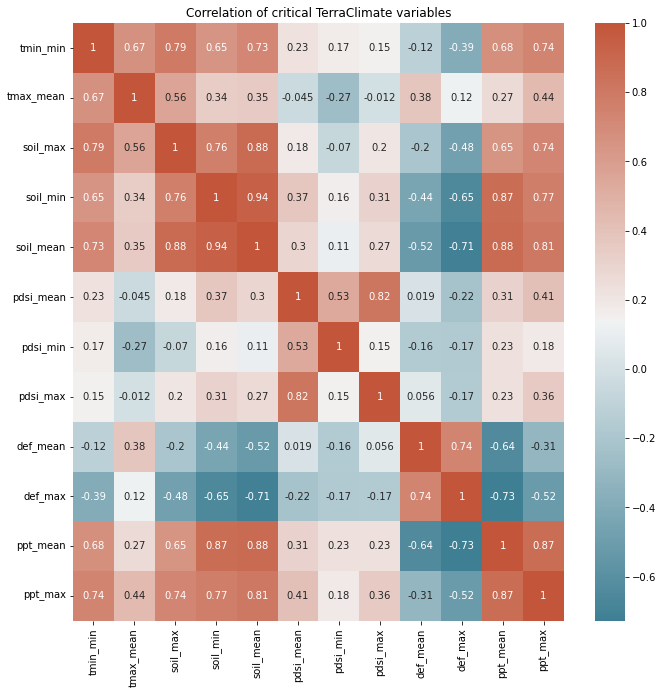

In [11]:
# Check the correlation matrix among climateFeatures
corrmat = df_climateFeatures_occurrencies.corr(method='pearson')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
ax.set_title('Correlation of critical TerraClimate variables')
sns.heatmap(corrmat, cmap=cmap, annot=True);

> There are some variables with high correlation, I will filter out those variables with correlation above 0.8

In [12]:
# Filtering out highly correlated variables
corr_features = correlation(df_climateFeatures_occurrencies, 0.8)
len(set(corr_features))
trainData = df_climateFeatures_occurrencies.copy()
trainData.drop(labels=corr_features, axis=1, inplace=True)

0.8765379825423791 soil_mean soil_max
0.9386128642604432 soil_mean soil_min
0.8237706468339365 pdsi_max pdsi_mean
0.8663397080083334 ppt_mean soil_min
0.8822695405029576 ppt_mean soil_mean
0.8100226673063734 ppt_max soil_mean
0.8691626732297019 ppt_max ppt_mean


In [13]:
trainData.columns

Index(['tmin_min', 'tmax_mean', 'pdsi_min', 'pdsi_max', 'def_mean', 'def_max',
       'ppt_max'],
      dtype='object')

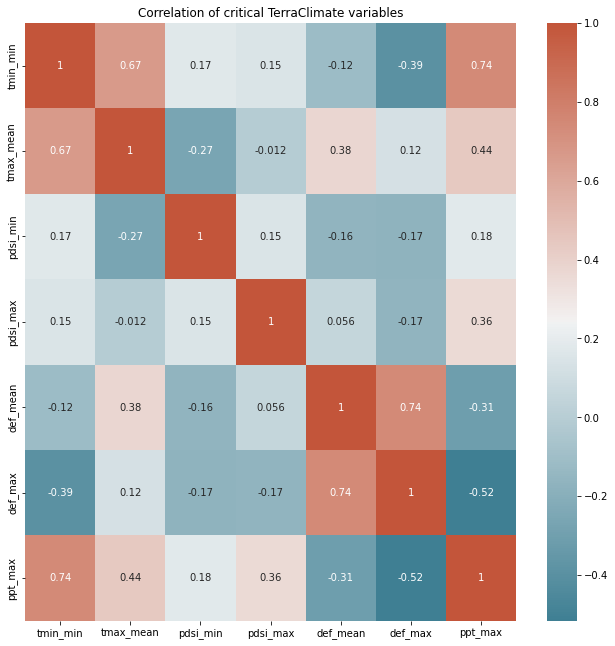

In [14]:
# Check the correlation matrix among climateFeatures including aonly the features selecte in the previous block.
corrmat = df_climateFeatures_occurrencies[trainData.columns].corr(method='pearson')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
ax.set_title('Correlation of critical TerraClimate variables')
sns.heatmap(corrmat, cmap=cmap, annot=True);

In [15]:
columnsFinal = list(trainData.columns)
columnsFinal.extend(['gbifID', 'decimalLatitude', 'decimalLongitude', 'occurrenceStatus'])
df_occurrencies = df_terraClimate_occ[columnsFinal]

In [16]:
df_occurrencies

,tmin_min,tmax_mean,pdsi_min,pdsi_max,def_mean,def_max,ppt_max,gbifID,decimalLatitude,decimalLongitude,occurrenceStatus
0,6.300003,23.181669,-5.000000,2.500000,30.300000,147.0,387.0,1944370584,-33.693144,151.320884,1
1,6.300003,23.583334,-5.200000,2.400000,41.966667,161.0,322.0,2423011701,-33.925746,151.164082,1
2,4.000000,23.356668,-8.099999,1.600000,30.433332,166.0,396.0,2236299662,-31.732415,152.088515,1
3,6.599998,23.895002,-6.200000,2.400000,45.200000,170.0,325.0,2563750401,-32.968624,151.644194,1
4,5.400002,23.756668,-6.700000,2.700001,42.833332,177.0,319.0,1850994254,-33.093048,151.416300,1
...,...,...,...,...,...,...,...,...,...,...,...
63876,5.400002,23.756668,-6.700000,2.700001,42.833332,177.0,319.0,3108845654,-33.091900,151.465000,1
63877,6.099998,22.176668,-5.800000,3.000000,32.633335,134.0,342.0,1457334961,-34.924979,150.647032,1
63879,6.500000,24.606668,-6.400000,2.100000,27.200000,136.0,495.0,3408189344,-26.754987,152.839291,1
63880,7.300003,22.588335,-5.700000,2.800001,33.333332,149.0,363.0,2981077059,-34.791600,150.779300,1


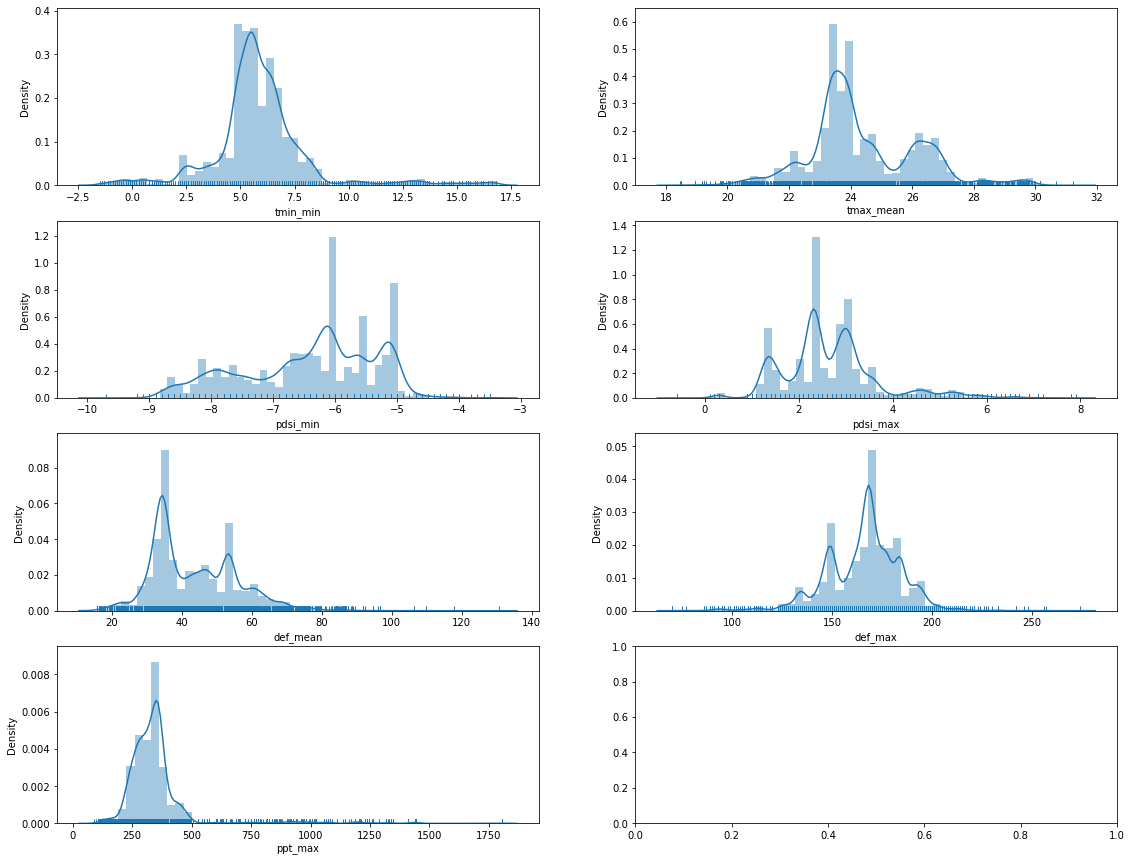

In [17]:
# Characterisation of the frogs habitat
n_rows=4
n_cols=2
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(19,15))
for i, column in enumerate(trainData.columns):
    sns.distplot(df_occurrencies[column],ax=axes[i//n_cols,i%n_cols], rug=True)

## 5. 🏞 Climate Data for pseudo-absence points

In [18]:
df_terraClimate_pseAbs = pd.read_csv('./data/complete_unbalanced.csv', index_col=0)
# Filter by Litoria Fallax Presence
df_terraClimate_pseAbs = df_terraClimate_pseAbs[df_terraClimate_pseAbs['occurrenceStatus'] == 0]

In [19]:
df_terraClimate_pseAbs = df_terraClimate_pseAbs[df_occurrencies.columns]
df_terraClimate_pseAbs

,tmin_min,tmax_mean,pdsi_min,pdsi_max,def_mean,def_max,ppt_max,gbifID,decimalLatitude,decimalLongitude,occurrenceStatus
8,-3.899998,15.046668,-5.8,4.300001,37.833332,177.0,166.0,2596664057,-35.817770,148.936030,0
9,-4.399998,14.053335,-5.7,4.200001,32.816666,170.0,175.0,2596664207,-35.706270,148.886660,0
10,-2.200001,20.750002,-8.2,5.300001,58.516666,215.0,162.0,1253333795,-30.280630,150.166360,0
11,6.099998,22.176668,-5.8,3.000000,32.633335,134.0,342.0,2446212885,-34.917460,150.649050,0
12,-2.200001,20.750002,-8.2,5.300001,58.516666,215.0,162.0,1253333801,-30.280630,150.166360,0
...,...,...,...,...,...,...,...,...,...,...,...
63883,3.700001,19.423335,-6.3,2.600000,64.783330,195.0,96.0,2420099493,-37.734715,144.328494,0
63884,4.300003,19.933335,-6.0,2.400000,70.500000,198.0,90.0,2420099296,-37.861180,144.268865,0
63885,4.300003,20.093335,-5.9,2.100000,73.683334,199.0,83.0,2420099324,-37.845236,144.354168,0
63886,5.300003,19.950002,-6.0,1.800001,71.833336,181.0,89.0,2420099687,-38.176213,144.355254,0


## 6. 🧼 Clean and prepare data set
The only thing that needs to be done beforehand is to change the variables so that they have a normal shape and scale them.

In [20]:
df_totalData = pd.concat([df_occurrencies, df_terraClimate_pseAbs])

In [21]:
df_totalData.columns

Index(['tmin_min', 'tmax_mean', 'pdsi_min', 'pdsi_max', 'def_mean', 'def_max',
       'ppt_max', 'gbifID', 'decimalLatitude', 'decimalLongitude',
       'occurrenceStatus'],
      dtype='object')

In [22]:
df_totalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63313 entries, 0 to 63887
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tmin_min          63313 non-null  float64
 1   tmax_mean         63313 non-null  float64
 2   pdsi_min          63313 non-null  float64
 3   pdsi_max          63313 non-null  float64
 4   def_mean          63313 non-null  float64
 5   def_max           63313 non-null  float64
 6   ppt_max           63313 non-null  float64
 7   gbifID            63313 non-null  int64  
 8   decimalLatitude   63313 non-null  float64
 9   decimalLongitude  63313 non-null  float64
 10  occurrenceStatus  63313 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 5.8 MB


In [23]:
dfLocation = df_totalData[['decimalLatitude', 'decimalLongitude']]

In [24]:
important_columns = ['def_max', 'def_mean', 'pdsi_max', 'pdsi_min', 'ppt_max', 'tmax_mean', 'tmin_min', 'occurrenceStatus']

In [25]:
df_totalData = df_totalData[important_columns]

### 6.1 Variables transformation

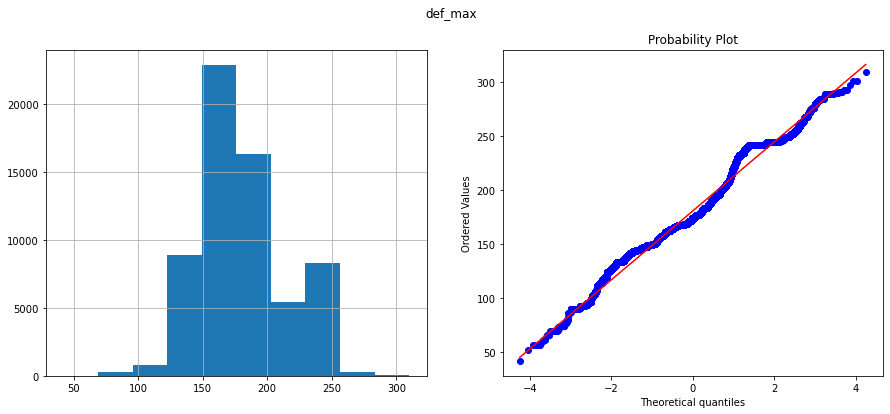

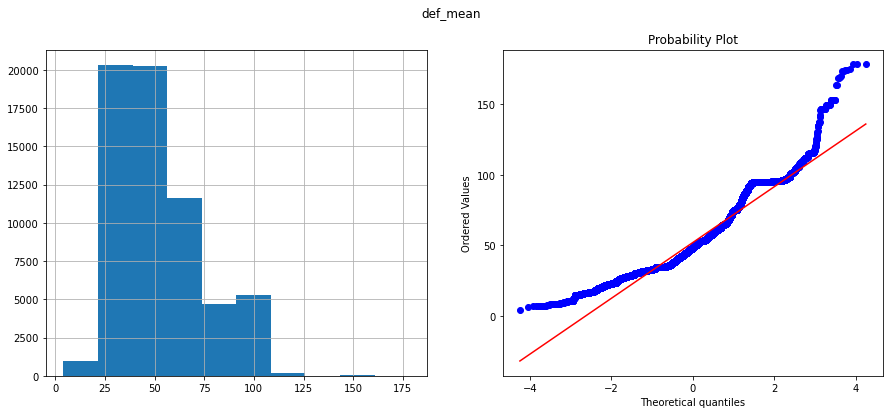

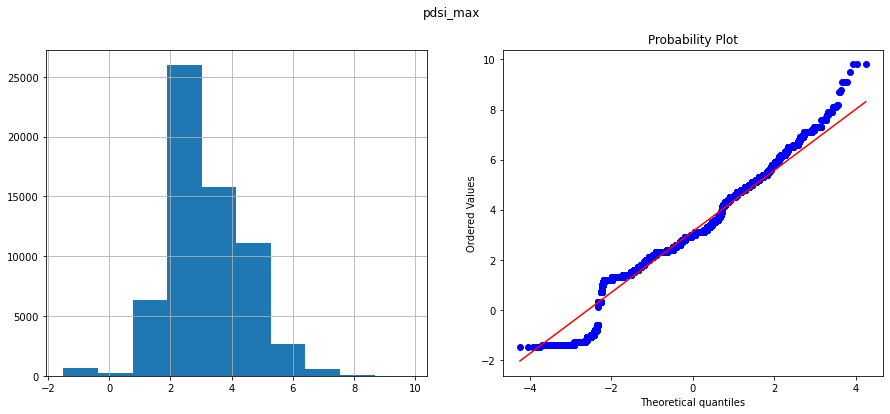

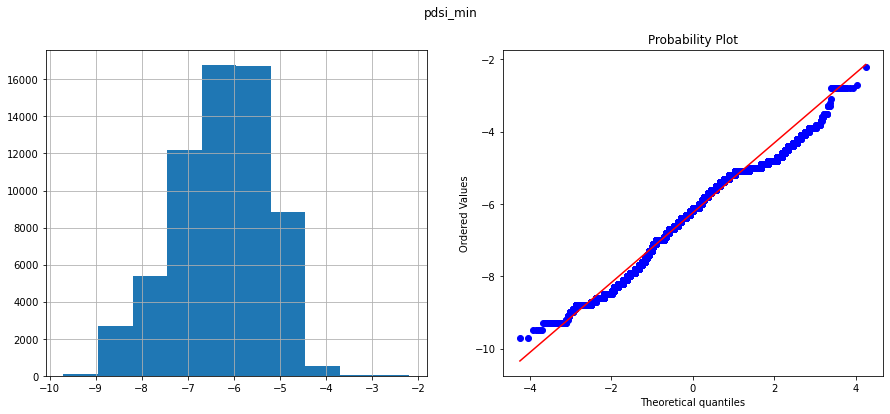

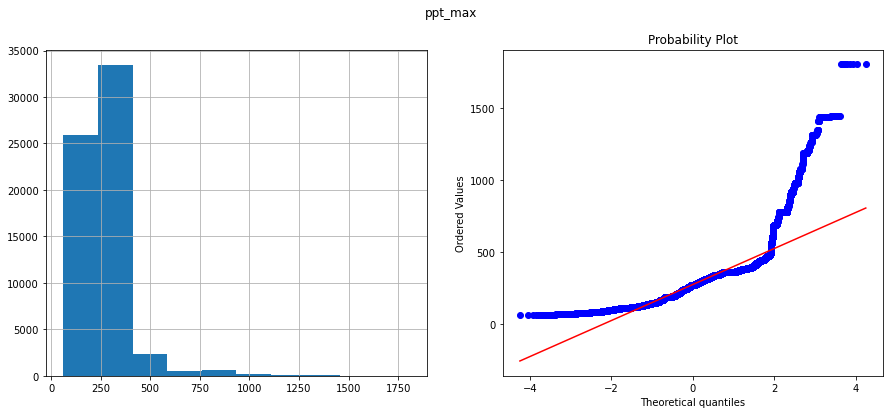

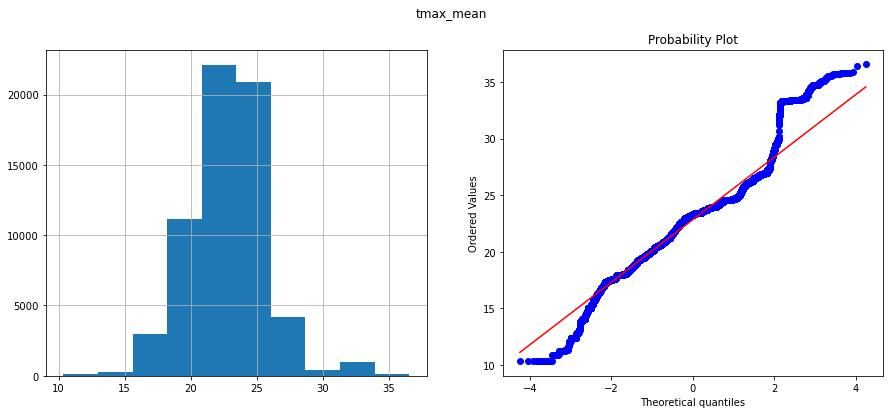

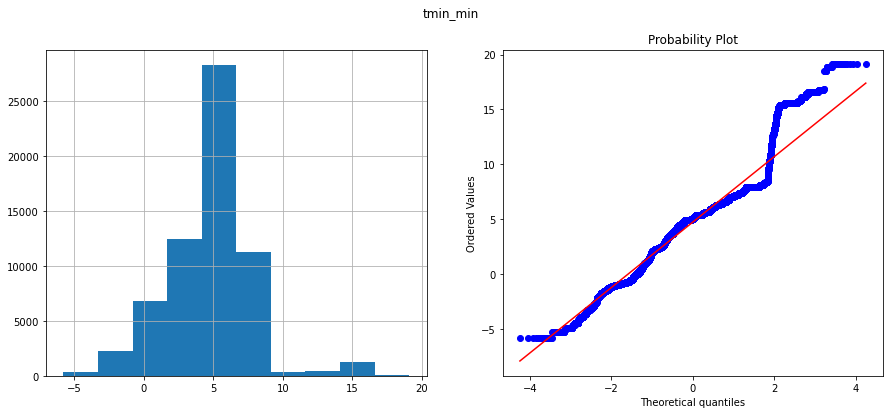

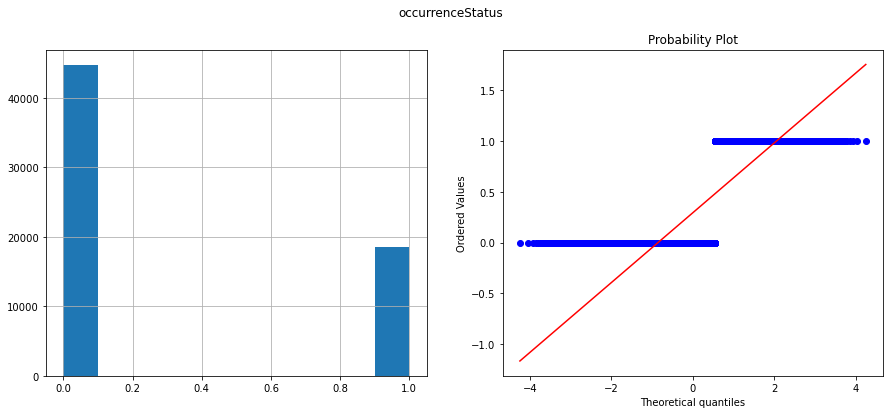

In [26]:
for variable in important_columns:
    diagnostic_plots(df_totalData, variable)

> The variables requiring transformation are  `def_mean` and `ppt_max`

#### def_mean
The best transformation was the **exponential**

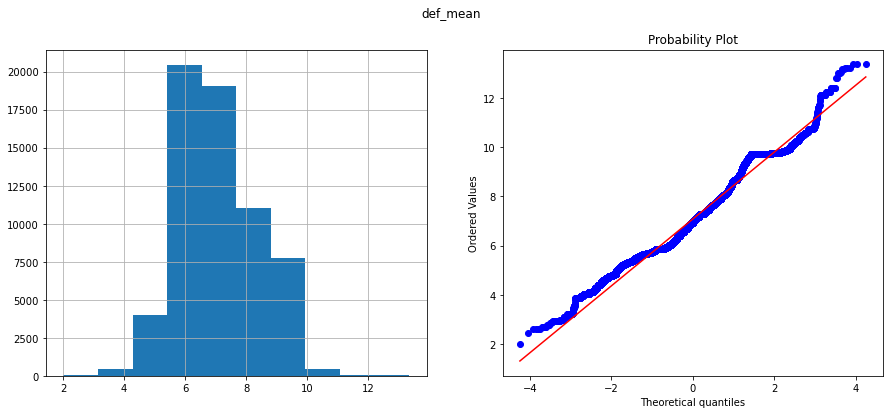

In [27]:
#Log Exponential Transformation
ex_defMean = vt.PowerTransformer(variables = 'def_mean')
ex_defMean.fit(df_totalData)
data_tf = ex_defMean.transform(df_totalData)
diagnostic_plots(data_tf, 'def_mean')

#### ppt_max
The best transformation was the **Log Transformation**

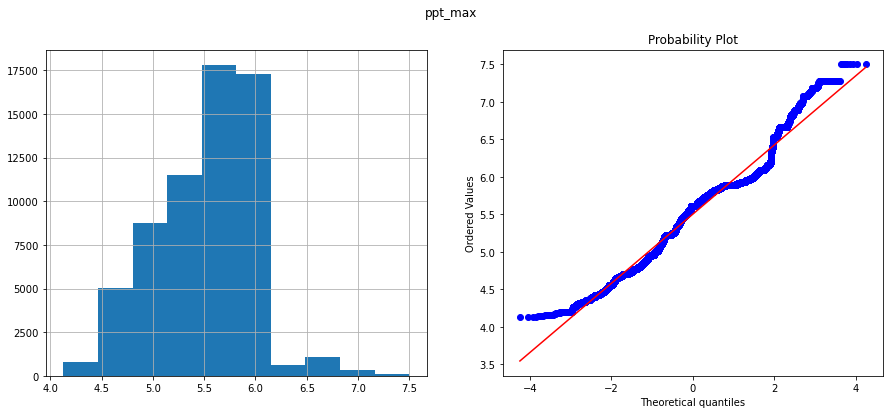

In [28]:
# Reciprocal Transformation
lt_pptMax = vt.LogTransformer(variables = 'ppt_max')
lt_pptMax.fit(df_totalData)
data_tf = lt_pptMax.transform(data_tf)
diagnostic_plots(data_tf, 'ppt_max')

### 6.2 Variables Normalization - Min_max Scaler

In [29]:
data_tf

,def_max,def_mean,pdsi_max,pdsi_min,ppt_max,tmax_mean,tmin_min,occurrenceStatus
0,147.0,5.504544,2.500000,-5.000000,5.958425,23.181669,6.300003,1
1,161.0,6.478168,2.400000,-5.200000,5.774552,23.583334,6.300003,1
2,166.0,5.516641,1.600000,-8.099999,5.981414,23.356668,4.000000,1
3,170.0,6.723095,2.400000,-6.200000,5.783825,23.895002,6.599998,1
4,177.0,6.544718,2.700001,-6.700000,5.765191,23.756668,5.400002,1
...,...,...,...,...,...,...,...,...
63883,195.0,8.048809,2.600000,-6.300000,4.564348,19.423335,3.700001,0
63884,198.0,8.396428,2.400000,-6.000000,4.499810,19.933335,4.300003,0
63885,199.0,8.583900,2.100000,-5.900000,4.418841,20.093335,4.300003,0
63886,181.0,8.475455,1.800001,-6.000000,4.488636,19.950002,5.300003,0


In [30]:
minMax_scaler = MinMaxScaler()
data_tf[['def_max','def_mean','pdsi_max', 'pdsi_min', 'ppt_max', 'tmax_mean', 'tmin_min']] = minMax_scaler.fit_transform(data_tf[['def_max','def_mean','pdsi_max', 'pdsi_min', 'ppt_max', 'tmax_mean', 'tmin_min']])
data_scaled = data_tf.copy()

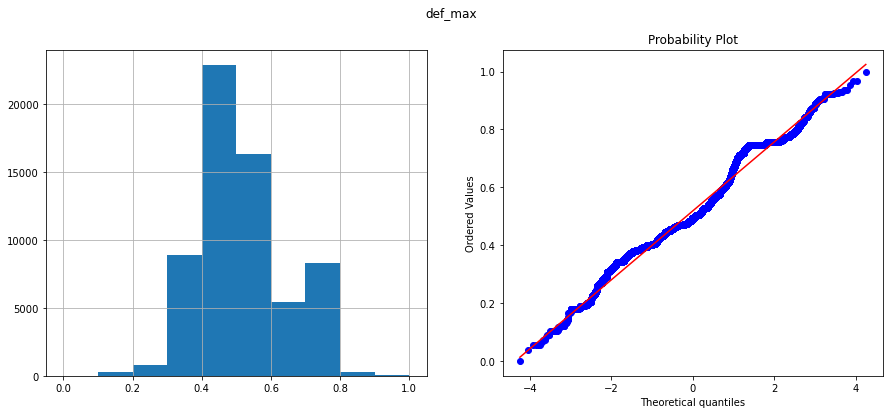

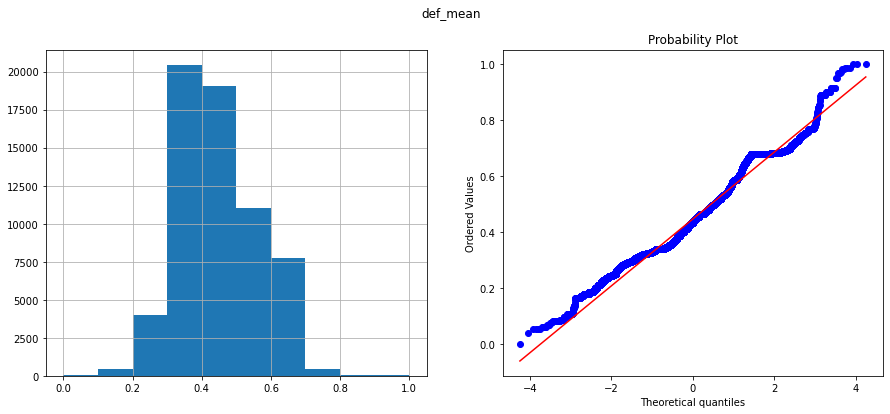

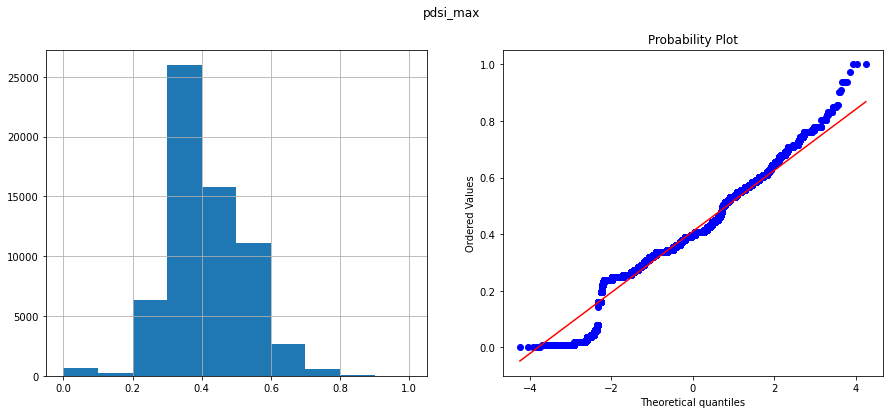

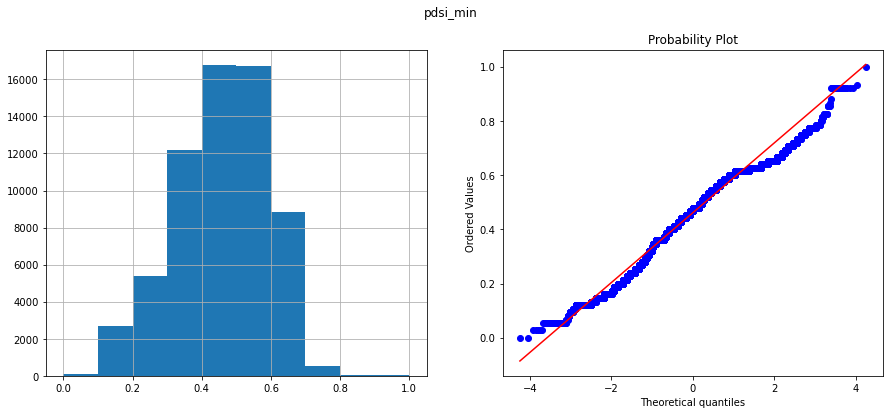

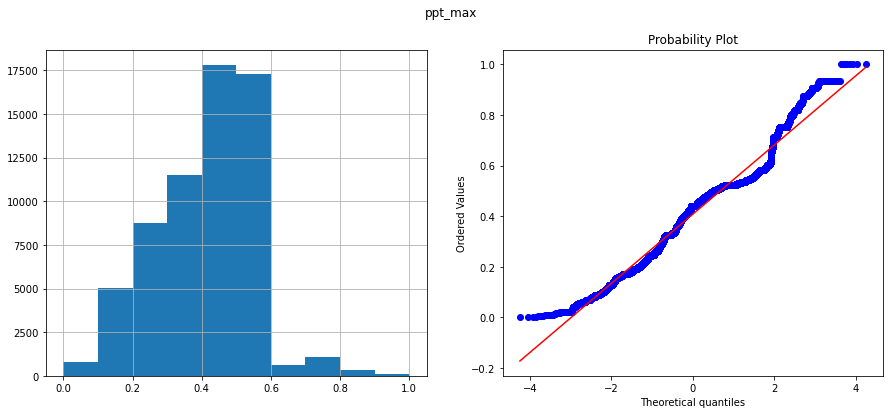

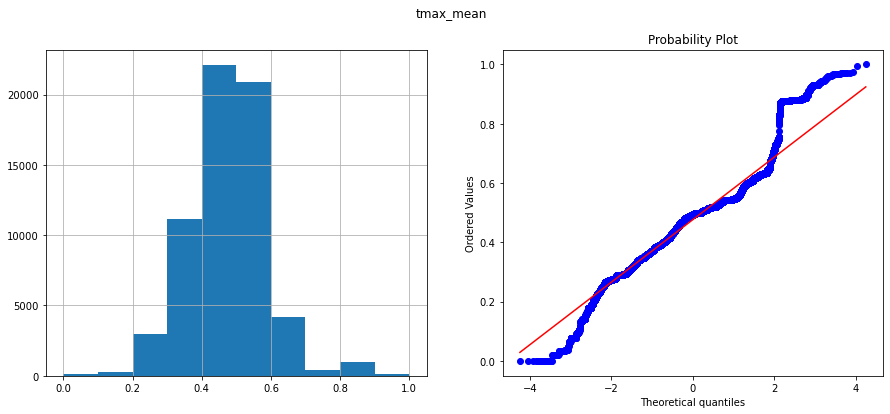

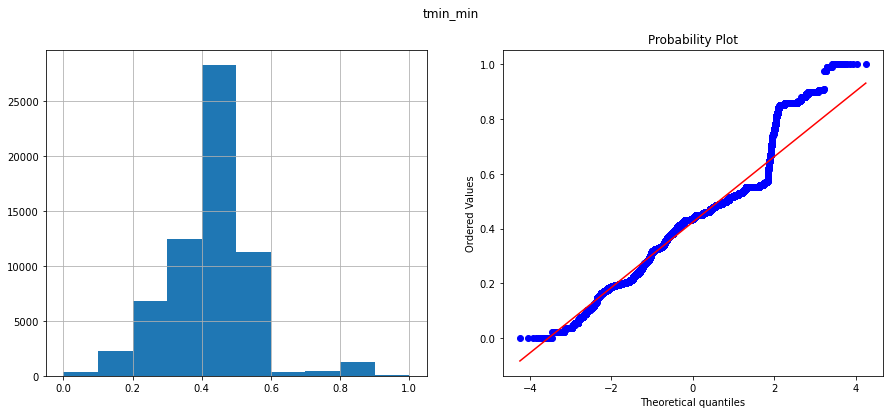

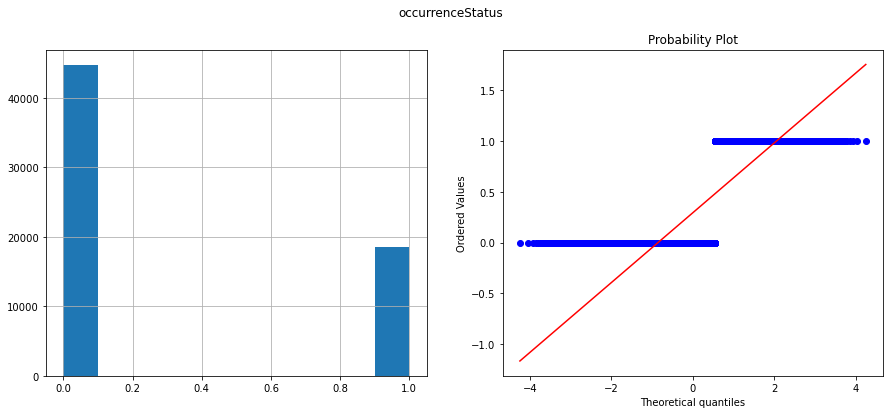

In [31]:
for variable in list(data_scaled.columns):
    diagnostic_plots(data_scaled, variable)

### 🛁 Final Pipeline

In [32]:
MyPipeline = Pipeline([
    # Variables transformation
    ('power_transformer', vt.PowerTransformer(variables = 'def_mean')),
    ('Log_transformer', vt.LogTransformer(variables = 'ppt_max')),
    #Scaling
    ('Scaler', MinMaxScaler())
])

## 7. ⚖️Balancing data and getting X and y

I will include longitude and latitude, so I can plot in the future the data points

In [33]:
df_totalData

,def_max,def_mean,pdsi_max,pdsi_min,ppt_max,tmax_mean,tmin_min,occurrenceStatus
0,147.0,30.300000,2.500000,-5.000000,387.0,23.181669,6.300003,1
1,161.0,41.966667,2.400000,-5.200000,322.0,23.583334,6.300003,1
2,166.0,30.433332,1.600000,-8.099999,396.0,23.356668,4.000000,1
3,170.0,45.200000,2.400000,-6.200000,325.0,23.895002,6.599998,1
4,177.0,42.833332,2.700001,-6.700000,319.0,23.756668,5.400002,1
...,...,...,...,...,...,...,...,...
63883,195.0,64.783330,2.600000,-6.300000,96.0,19.423335,3.700001,0
63884,198.0,70.500000,2.400000,-6.000000,90.0,19.933335,4.300003,0
63885,199.0,73.683334,2.100000,-5.900000,83.0,20.093335,4.300003,0
63886,181.0,71.833336,1.800001,-6.000000,89.0,19.950002,5.300003,0


In [34]:
data_scaled['decimalLongitude'] = dfLocation['decimalLongitude']
data_scaled['decimalLatitude'] = dfLocation['decimalLatitude']

In [35]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63313 entries, 0 to 63887
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   def_max           63313 non-null  float64
 1   def_mean          63313 non-null  float64
 2   pdsi_max          63313 non-null  float64
 3   pdsi_min          63313 non-null  float64
 4   ppt_max           63313 non-null  float64
 5   tmax_mean         63313 non-null  float64
 6   tmin_min          63313 non-null  float64
 7   occurrenceStatus  63313 non-null  int64  
 8   decimalLongitude  63313 non-null  float64
 9   decimalLatitude   63313 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 5.3 MB


In [36]:
data_scaled = data_scaled.astype({'occurrenceStatus': 'int'})

In [37]:
data_scaled

,def_max,def_mean,pdsi_max,pdsi_min,ppt_max,tmax_mean,tmin_min,occurrenceStatus,decimalLongitude,decimalLatitude
0,0.391791,0.308506,0.353982,0.626667,0.543130,0.489662,0.485944,1,151.320884,-33.693144
1,0.444030,0.394316,0.345133,0.600000,0.488596,0.504994,0.485944,1,151.164082,-33.925746
2,0.462687,0.309572,0.274336,0.213333,0.549948,0.496342,0.393574,1,152.088515,-31.732415
3,0.477612,0.415903,0.345133,0.466667,0.491347,0.516890,0.497992,1,151.644194,-32.968624
4,0.503731,0.400181,0.371681,0.400000,0.485820,0.511610,0.449799,1,151.416300,-33.093048
...,...,...,...,...,...,...,...,...,...,...
63883,0.570896,0.532744,0.362832,0.453333,0.129670,0.346205,0.381526,0,144.328494,-37.734715
63884,0.582090,0.563382,0.345133,0.493333,0.110529,0.365672,0.405623,0,144.268865,-37.861180
63885,0.585821,0.579904,0.318584,0.506667,0.086515,0.371779,0.405623,0,144.354168,-37.845236
63886,0.518657,0.570347,0.292035,0.493333,0.107215,0.366308,0.445783,0,144.355254,-38.176213


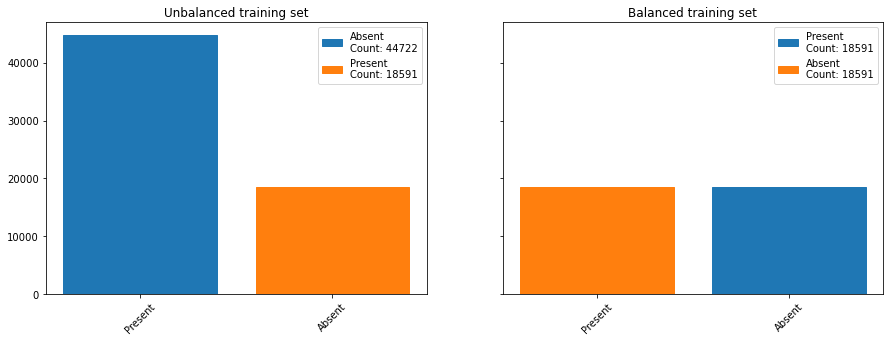

In [38]:
df_balancedData_1 = rebalance_data(data_scaled)
plot_unbalance_vs_unbalance(data_scaled, df_balancedData_1)

In [39]:
df_balancedData_1 = df_balancedData_1.sample(frac=1, random_state=10).reset_index(drop=True)
df_balancedData_1

,def_max,def_mean,pdsi_max,pdsi_min,ppt_max,tmax_mean,tmin_min,occurrenceStatus,decimalLongitude,decimalLatitude,key
0,0.697761,0.668877,0.584071,0.600000,0.175389,0.421783,0.481928,0,138.463123,-35.258300,6058
1,0.399254,0.345893,0.389380,0.546667,0.476374,0.485845,0.461848,1,150.777179,-34.495972,33774
2,0.753731,0.632734,0.530973,0.613333,0.348832,0.437305,0.417671,0,138.692000,-34.805100,10633
3,0.466418,0.412177,0.309734,0.466667,0.496772,0.511165,0.506024,1,151.644527,-33.025549,34259
4,0.473881,0.300297,0.469027,0.426667,0.523324,0.413640,0.301205,1,150.482000,-33.735000,35891
...,...,...,...,...,...,...,...,...,...,...,...
37177,0.496269,0.367616,0.353982,0.333333,0.493166,0.464024,0.401607,0,151.385000,-33.069800,10201
37178,0.488806,0.332592,0.601770,0.293333,0.391372,0.279153,0.200803,0,150.024378,-33.819298,9372
37179,0.503731,0.413604,0.451327,0.440000,0.459591,0.507730,0.333333,1,150.623347,-33.755787,28017
37180,0.358209,0.314473,0.398230,0.533333,0.518367,0.462752,0.465864,1,150.627859,-34.884526,29199


In [42]:
X = df_balancedData_1.iloc[:,:-4]
y = df_balancedData_1.occurrenceStatus

In [44]:
X.to_csv('./02_data_github/X.csv')
y.to_csv('./02_data_github/y.csv')

## 8. 🤖 Selecting the best model

In [104]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Math
import math

# Data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab
import scipy.stats as stats
import feature_engine.transformation as vt

# Import data
from ipynb.fs.defs.helper import (filter_bbox, get_frogs, plot_species, plot_barchart, get_terraclimate, create_target_variable, rebalance_data, 
                                  plot_unbalance_vs_unbalance, join_frogs, create_relation_plots, in_sample_out_sample_evaluation, evaluate_cross_KFold, predict_frogs,
                                 create_document_for_submission, plot_psabs_with_precense, correlation, diagnostic_plots, evaluate_cross_KFold_new, in_sample_out_sample_evaluation_X_y, plot_confusion_matrix)

# Geospatial
import contextily as cx
import xarray as xr
import zarr # Not referenced, but required for xarray

# Data Cleaning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV

# Machine Learning
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.calibration import calibration_curve
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

# Correlation
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile


# Visualization
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
from soilgrids import SoilGrids

data_path = './'

from sklearn.pipeline import Pipeline

In [66]:
#Import data
all_frog_data_complete = get_frogs(data_path+'/training_data/occurrence.txt', year_range=(2015, 2019))
df_australia = all_frog_data_complete[all_frog_data_complete['country']=='Australia']
df_australia = df_australia.dropna(axis=1)

all_frog_data = create_target_variable(df_australia)

df_terraClimate_pseAbs = pd.read_csv('./data/complete_unbalanced.csv', index_col=0)

In [67]:
# List of potential features based on the research done:
featuresClimate = [
 'tmin_min',
 'tmax_mean',
 'soil_max',
 'soil_min',
 'soil_mean',
 'pdsi_mean',
 'pdsi_min',
 'pdsi_max',
 'def_mean',
 'def_max',
 'ppt_mean',
 'ppt_max',
 ]
df_terraClimate_occ = pd.read_csv('./data/complete_unbalanced.csv', index_col=0)
# Filter by Litoria Fallax Presence
df_terraClimate_occ = df_terraClimate_occ[df_terraClimate_occ['occurrenceStatus'] == 1]
df_climateFeatures_occurrencies = df_terraClimate_occ[featuresClimate]


# Check the correlation matrix among climateFeatures
corrmat = df_climateFeatures_occurrencies.corr(method='pearson')


# Filtering out highly correlated variables
corr_features = correlation(df_climateFeatures_occurrencies, 0.8)
trainData = df_climateFeatures_occurrencies.copy()
trainData.drop(labels=corr_features, axis=1, inplace=True)


columnsFinal = list(trainData.columns)
columnsFinal.extend(['gbifID', 'decimalLatitude', 'decimalLongitude', 'occurrenceStatus'])
df_occurrencies = df_terraClimate_occ[columnsFinal]


0.8765379825423791 soil_mean soil_max
0.9386128642604432 soil_mean soil_min
0.8237706468339365 pdsi_max pdsi_mean
0.8663397080083334 ppt_mean soil_min
0.8822695405029576 ppt_mean soil_mean
0.8100226673063734 ppt_max soil_mean
0.8691626732297019 ppt_max ppt_mean


In [126]:
df_terraClimate_pseAbs = pd.read_csv('./data/complete_unbalanced.csv', index_col=0)
# Filter by Litoria Fallax Presence
df_terraClimate_pseAbs = df_terraClimate_pseAbs[df_terraClimate_pseAbs['occurrenceStatus'] == 0]
df_terraClimate_pseAbs = df_terraClimate_pseAbs[df_occurrencies.columns]
df_totalData = pd.concat([df_occurrencies, df_terraClimate_pseAbs])
dfLocation = df_totalData[['decimalLatitude', 'decimalLongitude']]
important_columns = ['def_max', 'def_mean', 'pdsi_max', 'pdsi_min', 'ppt_max', 'tmax_mean', 'tmin_min', 'occurrenceStatus']
df_totalData = df_totalData[important_columns]

MyPipeline = Pipeline([
    # Variables transformation
    ('power_transformer', vt.PowerTransformer(variables = 'def_mean')),
    ('Log_transformer', vt.LogTransformer(variables = 'ppt_max')),
    #Scaling
    ('Scaler', MinMaxScaler())
])

data_scaled = pd.DataFrame(MyPipeline.fit_transform(df_totalData), columns=df_totalData.columns)
data_scaled['decimalLongitude'] = dfLocation['decimalLongitude']
data_scaled['decimalLatitude'] = dfLocation['decimalLatitude']

df_balancedData_1 = rebalance_data(data_scaled)
df_balancedData_1 = df_balancedData_1.sample(frac=1, random_state=10).reset_index(drop=True)
X = df_balancedData_1.iloc[:,:-4]
y = df_balancedData_1.occurrenceStatus


In [195]:
df_terraClimate_pseAbs = pd.read_csv('./data/complete_unbalanced.csv', index_col=0)
# Filter by Litoria Fallax Presence
df_terraClimate_pseAbs = df_terraClimate_pseAbs[df_terraClimate_pseAbs['occurrenceStatus'] == 0]
df_terraClimate_pseAbs = df_terraClimate_pseAbs[df_occurrencies.columns]
df_totalData = pd.concat([df_occurrencies, df_terraClimate_pseAbs])
dfLocation = df_totalData[['decimalLatitude', 'decimalLongitude']]
important_columns = ['def_max', 'def_mean', 'pdsi_max', 'pdsi_min', 'ppt_max', 'tmax_mean', 'tmin_min', 'occurrenceStatus']
df_totalData = df_totalData[important_columns]

MyPipeline = Pipeline([
     # Variables transformation
     ('power_transformer', vt.PowerTransformer(variables = 'def_mean')),
     ('Log_transformer', vt.LogTransformer(variables = 'ppt_max')),
     #Scaling
     ('Scaler', MinMaxScaler())
 ])

data_scaled = pd.DataFrame(MyPipeline.fit_transform(df_totalData), columns=df_totalData.columns)
data_scaled['decimalLongitude'] = dfLocation['decimalLongitude']
data_scaled['decimalLatitude'] = dfLocation['decimalLatitude']


# df_balancedData_1 = rebalance_data(data_scaled)
# df_balancedData_1 = df_balancedData_1.sample(frac=1, random_state=10).reset_index(drop=True)
# X = df_balancedData_1.iloc[:,:-4]
# y = df_balancedData_1.occurrenceStatus


In [189]:
df_totalData

,tmin_min,tmax_mean,pdsi_min,pdsi_max,def_mean,def_max,ppt_max,gbifID,decimalLatitude,decimalLongitude,occurrenceStatus
0,6.300003,23.181669,-5.000000,2.500000,30.300000,147.0,387.0,1944370584,-33.693144,151.320884,1
1,6.300003,23.583334,-5.200000,2.400000,41.966667,161.0,322.0,2423011701,-33.925746,151.164082,1
2,4.000000,23.356668,-8.099999,1.600000,30.433332,166.0,396.0,2236299662,-31.732415,152.088515,1
3,6.599998,23.895002,-6.200000,2.400000,45.200000,170.0,325.0,2563750401,-32.968624,151.644194,1
4,5.400002,23.756668,-6.700000,2.700001,42.833332,177.0,319.0,1850994254,-33.093048,151.416300,1
...,...,...,...,...,...,...,...,...,...,...,...
63883,3.700001,19.423335,-6.300000,2.600000,64.783330,195.0,96.0,2420099493,-37.734715,144.328494,0
63884,4.300003,19.933335,-6.000000,2.400000,70.500000,198.0,90.0,2420099296,-37.861180,144.268865,0
63885,4.300003,20.093335,-5.900000,2.100000,73.683334,199.0,83.0,2420099324,-37.845236,144.354168,0
63886,5.300003,19.950002,-6.000000,1.800001,71.833336,181.0,89.0,2420099687,-38.176213,144.355254,0


In [197]:
filt = data_scaled.occurrenceStatus == 1
    # axis.scatter(
    #     data_scaled[filt].decimalLongitude, data_scaled[filt].decimalLatitude, 
    #     color = 'dodgerblue', marker='.', alpha=0.2, label='Target Species' if i==0 else ''
    # )

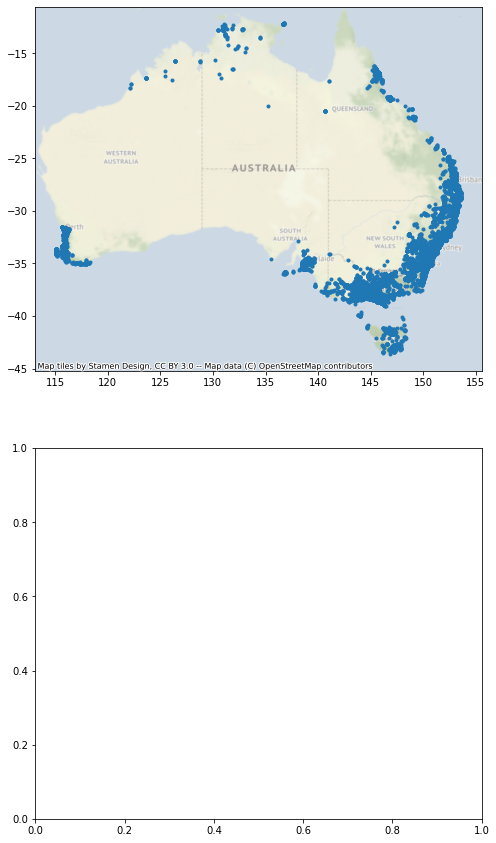

In [198]:
filt = data_scaled.occurrenceStatus == 1
fig, ax = plt.subplots(2, 1, figsize=(8, 15))
ax[0].scatter(
            data_scaled[filt].decimalLongitude, 
            data_scaled[filt].decimalLatitude, 
            marker='.', 
        )

# Add other features
#ax[0].set_title(f"Frog occurrences for {region_name}")
# ax[0].set_xticklabels([])
# ax[0].set_yticklabels([])
# ax[1].set_title(f"Frog species distribution in {region_name}")
cx.add_basemap(ax[0], crs={'init':'epsg:4326'}, alpha=0.5) # Add basemap

In [ ]:
df_terraClimate_pseAbs = pd.read_csv('./data/complete_unbalanced.csv', index_col=0)
# Filter by Litoria Fallax Presence
df_terraClimate_pseAbs = df_terraClimate_pseAbs[df_terraClimate_pseAbs['occurrenceStatus'] == 0]
df_terraClimate_pseAbs = df_terraClimate_pseAbs[df_occurrencies.columns]
df_totalData = pd.concat([df_occurrencies, df_terraClimate_pseAbs])
dfLocation = df_totalData[['decimalLatitude', 'decimalLongitude']]
important_columns = ['def_max', 'def_mean', 'pdsi_max', 'pdsi_min', 'ppt_max', 'tmax_mean', 'tmin_min', 'occurrenceStatus']
df_totalData = df_totalData[important_columns]

X = df_totalData.iloc[:,:-1]
y = df_totalData.occurrenceStatus

In [6]:
X.to_csv('data/X.csv')
y.to_csv('data/y.csv')

### Decision Trees

OUT OF BAG:
Fold 1 of 10
Fold 2 of 10
Fold 3 of 10
Fold 4 of 10
Fold 5 of 10
Fold 6 of 10
Fold 7 of 10
Fold 8 of 10
Fold 9 of 10
Fold 10 of 10

Metrics averaged over 10 trials:
F1: 0.86
Accuracy: 0.85
ROC_AUC: 0.85

 IN_SAMPLE train-test set
F1 Score - test-set: 0.86
Accuracy - test-set: 0.85 

IN_SAMPLE:
F1 Score: 0.86
Accuracy: 0.85 

Full model
F1 Score: 0.86
Accuracy: 0.85 



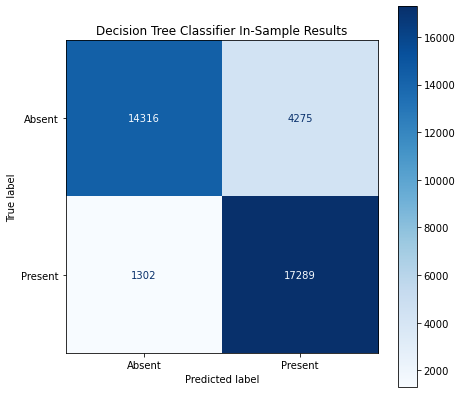

In [80]:
# Model 6 Decision Trees
dt_clf = DecisionTreeClassifier(random_state=10, min_samples_split=10, max_depth=10)
sub = in_sample_out_sample_evaluation_X_y(X, y, dt_clf)
plot_confusion_matrix(sub, 'Decision Tree Classifier', X, y)

In [81]:
X

,def_max,def_mean,pdsi_max,pdsi_min,ppt_max,tmax_mean,tmin_min
0,0.697761,0.668877,0.584071,0.600000,0.175389,0.421783,0.481928
1,0.399254,0.345893,0.389380,0.546667,0.476374,0.485845,0.461848
2,0.753731,0.632734,0.530973,0.613333,0.348832,0.437305,0.417671
3,0.466418,0.412177,0.309734,0.466667,0.496772,0.511165,0.506024
4,0.473881,0.300297,0.469027,0.426667,0.523324,0.413640,0.301205
...,...,...,...,...,...,...,...
37177,0.496269,0.367616,0.353982,0.333333,0.493166,0.464024,0.401607
37178,0.488806,0.332592,0.601770,0.293333,0.391372,0.279153,0.200803
37179,0.503731,0.413604,0.451327,0.440000,0.459591,0.507730,0.333333
37180,0.358209,0.314473,0.398230,0.533333,0.518367,0.462752,0.465864


In [78]:
properties = ['def_max',
 'def_mean',
 'pdsi_max',
 'pdsi_min',
 'ppt_max',
 'tmax_mean',
 'tmin_min']

In [79]:
min_lon, min_lat = (115.7, -38.5)  # Lower-left corner
max_lon, max_lat = (153.6, -16.7)  # Upper-right corner
bbox = (min_lon, min_lat, max_lon, max_lat)

# Metrics to measure over time dimension
tc_metrics = {
    'mean':{
        'fn':np.nanmean,
        'params':{}
    },
    'min':{
        'fn':np.nanmin,
        'params':{}
    },
    'max':{
        'fn':np.nanmax,
        'params':{}
    }
}

# Date range to take
time_slice = ('2015-01-01','2019-12-31')

# Measurements to take
assets=['def','pdsi','ppt','tmax','tmin']

# Features to take, in form '<asset>_<metric>'
features= properties

# Interpolate values to a 512x512 image
interp_dims = (512, 512)

weather_data = get_terraclimate(bbox, tc_metrics, time_slice=time_slice, assets=assets, features=features, interp_dims=interp_dims)
display(weather_data.band.values)

Loading data
Calculating mean
Calculating min
Calculating max
Interpolating image


array(['def_max', 'def_mean', 'pdsi_max', 'pdsi_min', 'ppt_max',
       'tmax_mean', 'tmin_min'], dtype='<U9')

In [86]:
predictor_image = weather_data.stack(z=("y", "x")).transpose()
# Reorder variables to be in same order as model
predictor_image = predictor_image.sel(band=sub.feature_names_in_)
null_pixels = (np.sum(predictor_image.isnull(), axis=-1) > 0)
probabilities = np.zeros((len(null_pixels), 2))

In [108]:
df_fullData = pd.DataFrame(predictor_image[~null_pixels].data, columns = properties)

In [133]:
df_fullData['occurrenceStatus']= 0

In [134]:
df_fullData

,def_max,def_mean,pdsi_max,pdsi_min,ppt_max,tmax_mean,tmin_min,occurrenceStatus
0,155.0,44.049999,4.400000,-7.200000,145.0,18.991667,5.599998,0
1,155.0,42.200001,4.200001,-7.000000,153.0,18.936666,5.599998,0
2,156.0,42.433334,4.000000,-7.000000,151.0,18.926670,5.500000,0
3,157.0,42.650002,3.900000,-7.000000,153.0,18.913336,5.400002,0
4,157.0,41.733334,3.800001,-7.000000,159.0,18.863337,5.300003,0
...,...,...,...,...,...,...,...,...
195918,148.0,47.983334,4.700001,-5.500000,875.0,28.325001,13.500000,0
195919,129.0,32.566666,5.100000,-5.300000,976.0,27.535002,12.800003,0
195920,128.0,29.500000,5.400000,-4.900000,988.0,27.875004,13.400002,0
195921,129.0,31.616667,5.300001,-4.599999,931.0,27.748333,14.000000,0


In [135]:
df_image_cleaned = pd.DataFrame(MyPipeline.transform(df_fullData), columns=df_fullData.columns)

In [139]:
df_image_cleaned = df_image_cleaned.iloc[:,:-1]
df_image_cleaned

,def_max,def_mean,pdsi_max,pdsi_min,ppt_max,tmax_mean,tmin_min
0,0.421642,0.408316,0.522124,0.333333,0.251977,0.329728,0.457831
1,0.421642,0.395901,0.504425,0.360000,0.267905,0.327629,0.457831
2,0.425373,0.397482,0.486726,0.360000,0.264002,0.327247,0.453815
3,0.429104,0.398946,0.477876,0.360000,0.267905,0.326738,0.449799
4,0.429104,0.392727,0.469027,0.360000,0.279313,0.324830,0.445783
...,...,...,...,...,...,...,...
195918,0.395522,0.433874,0.548673,0.560000,0.785082,0.685985,0.775100
195919,0.324627,0.326325,0.584071,0.586667,0.817481,0.655831,0.746988
195920,0.320896,0.302058,0.610619,0.640000,0.821105,0.668809,0.771084
195921,0.324627,0.318934,0.601770,0.680000,0.803481,0.663973,0.795181


In [146]:
 probabilities[~null_pixels] = sub.predict_proba(
        df_image_cleaned
    )

In [147]:
probabilities[null_pixels] = np.array([np.nan, np.nan])

In [150]:
probabilities = probabilities[:,1]

In [151]:
resultant_image = xr.DataArray(
    data=probabilities,
    dims=['z'],
    coords=dict(
        z=predictor_image.z
    )
)
# Unstack the image
resultant_image = resultant_image.unstack()

In [72]:
def predict_frogs(predictor_image, model):
    """Returns a (1, n, m) xarray where each pixel value corresponds to the probability of a frog occurrence.
    
    Takes in the multi-band image outputted by the `create_predictor_image` function as well as the
    trained model and returns the predictions for each pixel value. Firstly, the $x$ and $y$ indexes
    in the predictor image are stacked into one multi-index $z=(x, y)$ to produce an $k\times n$
    array, which is the format required to feed into our logistic regression model. Then, the array
    is fed into the model, returning the model's predictions for the frog likelihood at each pixel. 
    The predicted probabilities are then indexed by the same multi-index $z$ as before, which allows 
    the array to be unstacked and returned as a one-band image, ready for plotting.

    Arguments:
    predictor_image -- (K, n, m) xarray, where K is the number of predictor variables.
    model -- sklearn model with K predictor variables.
    """
    # Stack up pixels so they are in the appropriate format for the model
    predictor_image = predictor_image.stack(z=("y", "x")).transpose()
    # Reorder variables to be in same order as model
    predictor_image = predictor_image.sel(band=model.feature_names_in_)
    # Location of null values so that we can skip them (prediction model will break if nulls are present)
    null_pixels = (np.sum(predictor_image.isnull(), axis=-1) > 0)
    # Empty probabilities array
    probabilities = np.zeros((len(null_pixels), 2))
    # Calculate probability for each non-null pixel point
    probabilities[~null_pixels] = model.predict_proba(
        predictor_image[~null_pixels]
    )
    # Set null pixels to a probability of null
    probabilities[null_pixels] = np.array([np.nan, np.nan])
    # Just take probability of frog (class=1)
    probabilities = probabilities[:,1]
    # Add the coordinates to the probabilities, saving them in an xarray
    resultant_image = xr.DataArray(
        data=probabilities,
        dims=['z'],
        coords=dict(
            z=predictor_image.z
        )
    )
    # Unstack the image
    resultant_image = resultant_image.unstack()
    return resultant_image

# Calculate probability for each pixel point 


In [73]:
resultant_image = predict_frogs(X, sub)

TypeError: stack() got an unexpected keyword argument 'z'

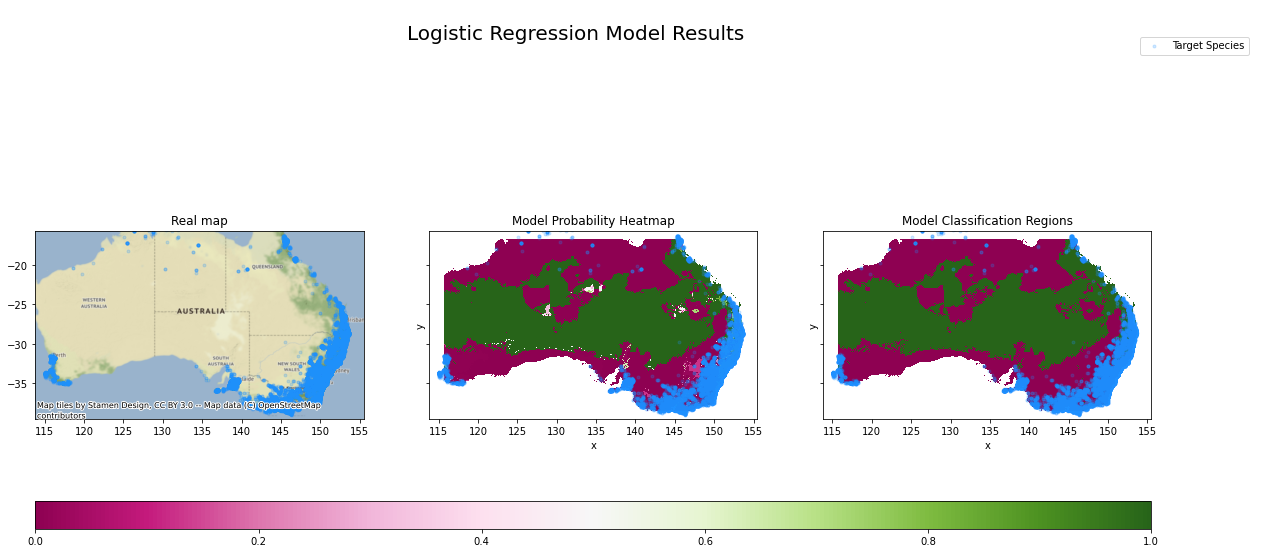

In [176]:
def plot_heatmap(resultant_image, df_balancedData_1, title, crs = {'init':'epsg:4326'}):
    """Plots a real map, probability heatmap, and model classification regions for the probability image from our model.

    Arguments:
    resultant_image -- (1, n, m) xarray of probabilities output from the model
    frog_data -- Dataframe of frog occurrences, indicated with a 1 in the occurrenceStatus column. 
                 Must contain ["occurrenceStatus", "decimalLongitude", "decimalLatitude"]
    title -- string that will be displayed as the figure title
    crs -- coordinate reference system for plotting the real map. Defaults to EPSG:4326.
    """
    fig, ax = plt.subplots(1, 3, figsize = (20, 10), sharex=True, sharey=True)
    extent = [resultant_image.x.min(),resultant_image.x.max(),resultant_image.y.min(),resultant_image.y.max()]
    cmap = 'PiYG'

    # Plot real map
    ax[0].scatter(x=[extent[0], extent[1]], y=[extent[2], extent[3]], alpha=0)
    cx.add_basemap(ax[0], crs=crs)
    ax[0].set_title('Real map')
    
    # Plot heatmap from model
    heatmap = resultant_image.plot.imshow(
        x='x', y='y', ax=ax[1], cmap=cmap, vmin=0, vmax=1, interpolation='none', add_colorbar=False
    )
    ax[1].set_aspect('equal')
    ax[1].set_title('Model Probability Heatmap')

    # Plot binary classification from model
    regions = xr.where(resultant_image.isnull(), np.nan, resultant_image>0.5).plot.imshow(
            x='x', y='y', ax=ax[2], cmap=cmap, vmin=0, vmax=1, interpolation='none', add_colorbar=False
    )
    ax[2].set_aspect('equal')
    ax[2].set_title('Model Classification Regions')

    # Plot real frogs
    for i, axis in enumerate(ax):
        filt = data_scaled.occurrenceStatus == 0.0
        axis.scatter(
            data_scaled[filt].decimalLongitude, data_scaled[filt].decimalLatitude, 
            color = 'dodgerblue', marker='.', alpha=0.2, label='Target Species' if i==0 else ''
        )

    fig.colorbar(heatmap, ax=ax, location = 'bottom', aspect=40)
    fig.legend(loc = (0.9, 0.9))
    fig.suptitle(title, x=0.5, y=0.9, fontsize=20)
    
plot_heatmap(resultant_image, df_balancedData_1, f"Logistic Regression Model Results")

In [166]:
filt = df_balancedData_1.occurrenceStatus == 1
df_balancedData_1[filt].decimalLongitude

1        152.581000
3        151.365000
4        149.156000
5        150.827000
6        147.051985
            ...    
37168    151.347000
37171    145.470704
37172    122.234415
37179    151.303000
37180    153.067000
Name: decimalLongitude, Length: 18591, dtype: float64

#### Grid Search

In [ ]:
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, random_state=420, shuffle=True)
Dt_clf_GS = DecisionTreeClassifier(random_state=10)
param_grid = { 
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10, 15, 20],
    'max_depth': [10, 15, 100]
}
GS_DT = GridSearchCV(estimator=Dt_clf_GS, param_grid=param_grid, cv= skf, scoring='f1', verbose=10)
GS_DT.fit(X, y)

In [96]:
GS_DT.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=10)

In [97]:
GS_DT.best_score_

0.8890427280977186

OUT OF BAG:
Fold 1 of 10
Fold 2 of 10
Fold 3 of 10
Fold 4 of 10
Fold 5 of 10
Fold 6 of 10
Fold 7 of 10
Fold 8 of 10
Fold 9 of 10
Fold 10 of 10

Metrics averaged over 10 trials:
F1: 0.89
Accuracy: 0.89
ROC_AUC: 0.89

 IN_SAMPLE train-test set
F1 Score - test-set: 0.88
Accuracy - test-set: 0.88 

IN_SAMPLE:
F1 Score: 0.96
Accuracy: 0.96 

Full model
F1 Score: 0.96
Accuracy: 0.96 



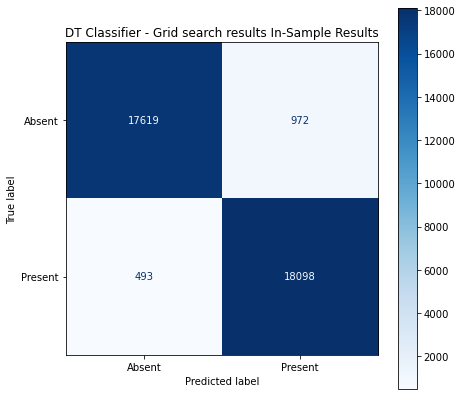

In [98]:
# Grid Search
DT_clf = DecisionTreeClassifier(criterion='entropy', random_state=10)
sub = in_sample_out_sample_evaluation_X_y(X, y, DT_clf)
plot_confusion_matrix(sub, 'DT Classifier - Grid search results', X, y)

### Random forest

OUT OF BAG:
Fold 1 of 10
Fold 2 of 10
Fold 3 of 10
Fold 4 of 10
Fold 5 of 10
Fold 6 of 10
Fold 7 of 10
Fold 8 of 10
Fold 9 of 10
Fold 10 of 10

Metrics averaged over 10 trials:
F1: 0.86
Accuracy: 0.85
ROC_AUC: 0.85

 IN_SAMPLE train-test set
F1 Score - test-set: 0.86
Accuracy - test-set: 0.85 

IN_SAMPLE:
F1 Score: 0.87
Accuracy: 0.86 

Full model
F1 Score: 0.87
Accuracy: 0.86 



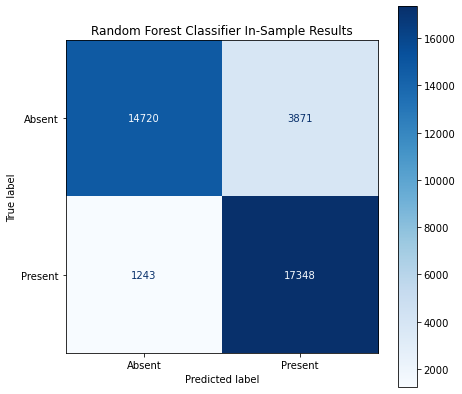

In [15]:
# Model 7 Random Forest
rf_clf= RandomForestClassifier(random_state=10)
sub = in_sample_out_sample_evaluation_X_y(X, y, rf_clf)
plot_confusion_matrix(sub, 'Random Forest Classifier', X, y)

#### Grid Search

In [63]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(verbose=10)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=10, random_state=42, n_jobs = -1, scoring='f1')
# Fit the random search model
rf_random.fit(X, y)

In [ ]:
rf_random.best_estimator_

In [127]:
rf_random.best_score_

0.89906528523339

OUT OF BAG:
Fold 1 of 10
Fold 2 of 10
Fold 3 of 10
Fold 4 of 10
Fold 5 of 10
Fold 6 of 10
Fold 7 of 10
Fold 8 of 10
Fold 9 of 10
Fold 10 of 10

Metrics averaged over 10 trials:
F1: 0.91
Accuracy: 0.9
ROC_AUC: 0.9

 IN_SAMPLE train-test set
F1 Score - test-set: 0.9
Accuracy - test-set: 0.89 

IN_SAMPLE:
F1 Score: 0.95
Accuracy: 0.95 

Full model
F1 Score: 0.95
Accuracy: 0.95 



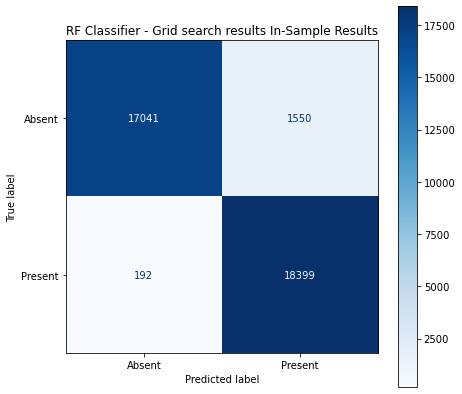

In [129]:
# Grid Search
RF_clf = RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=1000, random_state=10)
sub = in_sample_out_sample_evaluation_X_y(X, y, RF_clf )
plot_confusion_matrix(sub, 'RF Classifier - Grid search results', X, y)

### Extra trees ensemble

OUT OF BAG:
Fold 1 of 10
Fold 2 of 10
Fold 3 of 10
Fold 4 of 10
Fold 5 of 10
Fold 6 of 10
Fold 7 of 10
Fold 8 of 10
Fold 9 of 10
Fold 10 of 10

Metrics averaged over 10 trials:
F1: 0.86
Accuracy: 0.85
ROC_AUC: 0.85

 IN_SAMPLE train-test set
F1 Score - test-set: 0.86
Accuracy - test-set: 0.85 

IN_SAMPLE:
F1 Score: 0.87
Accuracy: 0.86 

Full model
F1 Score: 0.87
Accuracy: 0.86 



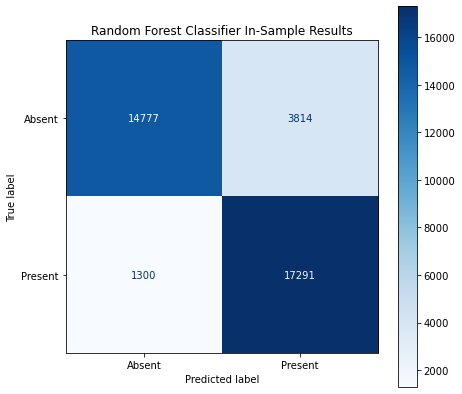

In [50]:
# Model 8 Extra trees ensemble - THIS IS FAST
exTr_clf= ExtraTreesClassifier(random_state=10)
sub = in_sample_out_sample_evaluation_X_y(X, y, exTr_clf)
plot_confusion_matrix(sub, 'Random Forest Classifier', X, y)

#### Grid Search

In [148]:
param_grid={
        'n_estimators': range(50,126,25),
        'max_features': range(1,len(X.columns)+1,2),
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
    },

In [ ]:
ExRf = ExtraTreesClassifier(random_state=10)
rf_random = RandomizedSearchCV(estimator = ExRf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=10, random_state=42, n_jobs = -1, scoring='f1')
rf_random.fit(X, y)

In [150]:
rf_random.best_estimator_

ExtraTreesClassifier(max_features=9, min_samples_leaf=20, min_samples_split=25,
                     random_state=10)

In [151]:
rf_random.best_score_

0.8660236033784375

In [ ]:
# Grid Search
ExRF_clf = ExtraTreesClassifier(max_features=9, min_samples_leaf=20, min_samples_split=25, random_state=10)
sub = in_sample_out_sample_evaluation_X_y(X, y, ExRF_clf )
plot_confusion_matrix(sub, 'ExtraRF Classifier - Grid search results', X, y)

### Bagging Classifier

OUT OF BAG:
Fold 1 of 10
Fold 2 of 10
Fold 3 of 10
Fold 4 of 10
Fold 5 of 10
Fold 6 of 10
Fold 7 of 10
Fold 8 of 10
Fold 9 of 10
Fold 10 of 10

Metrics averaged over 10 trials:
F1: 0.86
Accuracy: 0.85
ROC_AUC: 0.85

 IN_SAMPLE train-test set
F1 Score - test-set: 0.86
Accuracy - test-set: 0.85 

IN_SAMPLE:
F1 Score: 0.87
Accuracy: 0.86 

Full model
F1 Score: 0.87
Accuracy: 0.86 



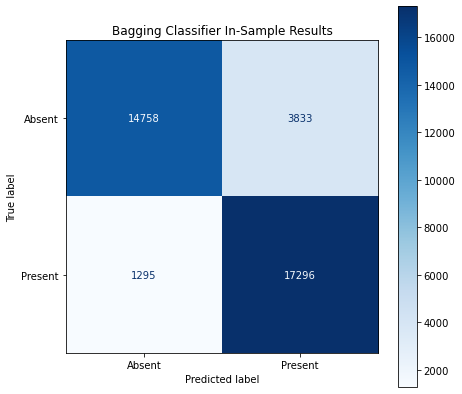

In [36]:
# Model seven
bag_clf= BaggingClassifier(random_state=10)
sub = in_sample_out_sample_evaluation_X_y(X, y, bag_clf)
plot_confusion_matrix(sub, 'Bagging Classifier', X, y)

# MINE

In [16]:
val_test = pd.read_csv('./data/valTest.csv', index_col=0, na_values='')
val_test = val_test.dropna(axis=0)
val_data_location = val_test[['decimalLongitude', 'decimalLatitude']]
val_data_included_in_model = val_test[important_columns[:-1]]

In [17]:
val_data_included_in_model

,def_max,def_mean,pdsi_max,pdsi_min,ppt_max,tmax_mean,tmin_min
0,181.0,54.083333,2.000000,-6.400000,136.0,20.603335,5.200005
1,200.0,73.483333,1.500000,-6.099999,96.0,20.991668,5.400002
2,164.0,41.766667,1.400000,-6.900000,151.0,19.890002,4.700005
3,200.0,66.650000,2.400000,-6.400000,91.0,20.261668,3.900002
4,133.0,32.416667,-1.000000,-5.900000,194.0,19.018335,5.200005
...,...,...,...,...,...,...,...
4046,233.0,82.850000,3.400000,-5.000000,240.0,23.128335,5.000000
4047,240.0,89.433333,2.800001,-7.500000,201.0,23.966668,7.700005
4048,238.0,90.933333,2.800001,-7.300000,207.0,24.053335,7.900002
4049,237.0,88.716667,3.600000,-4.700000,217.0,23.573335,4.700005


In [18]:
val_data_included_in_model['occurrenceStatus'] = 0

In [19]:
df_val_transf = ex_defMean.transform(val_data_included_in_model)
df_val_transf = lt_pptMax.transform(df_val_transf)
val_scaled = minMax_scaler.transform(df_val_transf)
df_val_transf_sca = pd.DataFrame(val_scaled, columns=df_val_transf.columns)

In [20]:
df_val_transf_sca = df_val_transf_sca.drop(['occurrenceStatus'],axis =1)

In [21]:
df_val_transf_sca

,def_max,def_mean,pdsi_max,pdsi_min,ppt_max,tmax_mean,tmin_min
0,0.518657,0.471519,0.309734,0.440000,0.232972,0.391246,0.441767
1,0.589552,0.578877,0.265487,0.480000,0.129670,0.406069,0.449799
2,0.455224,0.392954,0.256637,0.373333,0.264002,0.364018,0.421687
3,0.589552,0.542892,0.345133,0.440000,0.113806,0.378205,0.389558
4,0.339552,0.325165,0.044248,0.506667,0.338319,0.330746,0.441767
...,...,...,...,...,...,...,...
3981,0.712687,0.625585,0.433628,0.626667,0.401427,0.487626,0.433735
3982,0.738806,0.656848,0.380531,0.293333,0.348832,0.519626,0.542169
3983,0.731343,0.663809,0.380531,0.320000,0.357556,0.522934,0.550201
3984,0.727612,0.653502,0.451327,0.666667,0.371548,0.504612,0.421687


In [51]:
predictions = sub.predict(df_val_transf_sca)

In [52]:
print(f'The number of predicted occurencies by {sub} were {np.sum(predictions)}')

The number of predicted occurencies by ExtraTreesClassifier(random_state=10) were 1729.0


In [53]:
val_test['occurrenceStatus'] = predictions

In [54]:
val_test

,decimalLatitude,decimalLongitude,aet_max,aet_mean,aet_min,def_max,def_mean,def_min,pdsi_max,pdsi_mean,...,vap_max,vap_mean,vap_min,vpd_max,vpd_mean,vpd_min,ws_max,ws_mean,ws_min,occurrenceStatus
0,-37.937500,145.187500,113.0,57.016667,19.0,181.0,54.083333,0.0,2.000000,-3.225000,...,1.53,1.125667,0.83,1.27,0.704500,0.28,6.7,4.906667,3.7,0.0
1,-37.770833,144.979167,92.0,44.866667,8.0,200.0,73.483333,0.0,1.500000,-2.696666,...,1.55,1.119333,0.81,1.34,0.740667,0.26,7.3,5.421667,3.9,0.0
2,-37.979167,145.354167,126.0,63.016667,26.0,164.0,41.766667,0.0,1.400000,-3.690000,...,1.49,1.100167,0.83,1.21,0.645000,0.25,6.5,4.710000,3.4,0.0
3,-37.604167,145.020833,96.0,44.216667,10.0,200.0,66.650000,0.0,2.400000,-2.608333,...,1.47,1.051667,0.77,1.44,0.710333,0.19,6.5,4.688333,3.3,0.0
4,-38.479167,145.645833,131.0,66.900000,30.0,133.0,32.416667,0.0,-1.000000,-3.323333,...,1.57,1.133500,0.87,0.91,0.547833,0.25,7.8,5.340000,3.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,-31.895833,116.145833,106.0,48.100000,5.0,233.0,82.850000,0.0,3.400000,-1.428333,...,1.49,1.169667,0.90,1.99,0.978167,0.32,5.4,3.803333,2.3,0.0
4047,-32.395833,115.770833,99.0,48.666667,5.0,240.0,89.433333,0.0,2.800001,-2.831666,...,1.74,1.372833,1.06,1.75,0.931833,0.40,7.0,5.156667,3.4,0.0
4048,-32.145833,115.854167,101.0,48.516667,5.0,238.0,90.933333,0.0,2.800001,-2.650000,...,1.72,1.352667,1.03,1.83,0.972833,0.42,6.5,4.856667,3.1,0.0
4049,-31.812500,116.229167,103.0,43.650000,4.0,237.0,88.716667,0.0,3.600000,-1.095000,...,1.48,1.157833,0.88,2.13,1.028167,0.31,5.1,3.588333,2.1,0.0


In [55]:
# Read the benchmark file
test_file = pd.read_csv('challenge_1_submission_benchmark.csv')

# Merging files
merged_table = test_file.merge(val_test, on = ['decimalLatitude', 'decimalLongitude'], how = 'left', suffixes=['_test', '_pred'])

In [56]:
merged_table

,id,decimalLatitude,decimalLongitude,occurrenceStatus_test,aet_max,aet_mean,aet_min,def_max,def_mean,def_min,...,vap_max,vap_mean,vap_min,vpd_max,vpd_mean,vpd_min,ws_max,ws_mean,ws_min,occurrenceStatus_pred
0,0,-37.9375,145.1875,0,113.0,57.016667,19.0,181.0,54.083333,0.0,...,1.53,1.125667,0.83,1.27,0.704500,0.28,6.7,4.906667,3.7,0.0
1,0,-37.9375,145.1875,0,113.0,57.016667,19.0,181.0,54.083333,0.0,...,1.53,1.125667,0.83,1.27,0.704500,0.28,6.7,4.906667,3.7,0.0
2,0,-37.9375,145.1875,0,113.0,57.016667,19.0,181.0,54.083333,0.0,...,1.53,1.125667,0.83,1.27,0.704500,0.28,6.7,4.906667,3.7,0.0
3,0,-37.9375,145.1875,0,113.0,57.016667,19.0,181.0,54.083333,0.0,...,1.53,1.125667,0.83,1.27,0.704500,0.28,6.7,4.906667,3.7,0.0
4,0,-37.9375,145.1875,0,113.0,57.016667,19.0,181.0,54.083333,0.0,...,1.53,1.125667,0.83,1.27,0.704500,0.28,6.7,4.906667,3.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128620,4050,-31.5625,116.0625,1,90.0,42.783333,3.0,249.0,96.450000,0.0,...,1.55,1.211333,0.92,2.19,1.120667,0.39,5.2,3.753333,2.2,0.0
128621,4050,-31.5625,116.0625,1,90.0,42.783333,3.0,249.0,96.450000,0.0,...,1.55,1.211333,0.92,2.19,1.120667,0.39,5.2,3.753333,2.2,0.0
128622,4050,-31.5625,116.0625,1,90.0,42.783333,3.0,249.0,96.450000,0.0,...,1.55,1.211333,0.92,2.19,1.120667,0.39,5.2,3.753333,2.2,0.0
128623,4050,-31.5625,116.0625,1,90.0,42.783333,3.0,249.0,96.450000,0.0,...,1.55,1.211333,0.92,2.19,1.120667,0.39,5.2,3.753333,2.2,0.0


In [57]:
# Cleaning
merged_table = merged_table.drop_duplicates()
merged_table = merged_table[['decimalLatitude', 'decimalLongitude', 'occurrenceStatus_pred']]
merged_table = merged_table.reset_index()
merged_table.index.names = ['id']
merged_table.drop('index', axis=1, inplace=True)
merged_table.columns = ['decimalLatitude', 'decimalLongitude', 'occurrenceStatus']

# Prediction with nan values were replaced by zero
merged_table.fillna(0, inplace=True)

In [58]:
copy_mergedTable = merged_table.copy()
n = copy_mergedTable[copy_mergedTable['occurrenceStatus'] == 1.0]['color']='blue'
copy_mergedTable[copy_mergedTable['occurrenceStatus'] == 0.0]['color']='red'

In [59]:
copy_mergedTable['color'] = np.where(copy_mergedTable['occurrenceStatus'] == 1.0, 'blue', 'red')

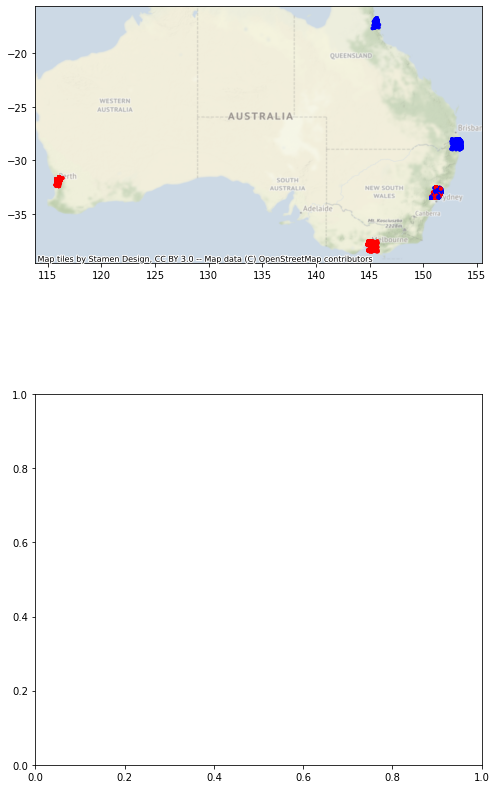

In [60]:

fig, ax = plt.subplots(2, 1, figsize=(8, 15))
ax[0].scatter(
            copy_mergedTable.decimalLongitude, 
            copy_mergedTable.decimalLatitude, 
            marker='.', 
            color=copy_mergedTable.color,
        )

# Add other features
#ax[0].set_title(f"Frog occurrences for {region_name}")
# ax[0].set_xticklabels([])
# ax[0].set_yticklabels([])
# ax[1].set_title(f"Frog species distribution in {region_name}")
cx.add_basemap(ax[0], crs={'init':'epsg:4326'}, alpha=0.5) # Add basemap
# ax[1].set_xticklabels(bar_data.index.str.replace(' ', '\n'), rotation=45)
# ax[1].legend()

In [61]:
v45 = merged_table

In [62]:
v45.to_csv('./sub/v45.csv')

# 🤞 Submissions

|Winner| Submission name | Description |  F-1 Score - K fold |  Private Evaluation | Predictions
| --- | :---: | :---: | :---: |  :---: | :---: |
| | v22 | Log Regression - standar | 0.82 |  0.73 | 1868
| | v23 | LogisticRegression(class_weight={0: 1.5}) | 0.77 |  0.72 | 1686
| | v24 | LogisticRegression(C=0.1, penalty='none', solver='saga') | 0.82 |  0.73 | 1860
| | v25 | SVC() | 0.83 |  0.74 | 1929
| | v26 | SVC(class_weight={0: 1.5}) | - |  0.74 | 1748
| | v27 | LinearSVC() | 0.82 | - | 1862
| | v28 | LinearSVC(C=0.8, dual=False, penalty='l1', random_state=10) | 0.82 | 0.73 | 1863
| | v29 | SGDClassifier(random_state=10) | 0.83 | 0.72 | 1898
| | v30 | SGDClassifier(class_weight='balanced', penalty='l1', random_state=10) | 0.83 | - | 1902
| | v31 | KNeighborsClassifier() | 0.89 | 0.69 | 1653
| | v32 | KNeighborsClassifier(n_neighbors=7, weights='distance') | 0.9 | - | 1654
| | v33 | DecisionTreeClassifier(random_state=10) | 0.89 | 0.64 | 1296
| | v34 | RandomForestClassifier(random_state=10) | 0.91 | 0.72 | 1452
| | v35 | RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=1000,verbose=10) | 0.91 | - | - |
| | v36 | RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=1000,verbose=10) | 0.9 | - | 1461 |
| | v37 | ExtraTreesClassifier()   |0.9| 0.72 | 1423 |
| | v38 | ExtraTreesClassifier(max_features=9, min_samples_leaf=20, min_samples_split=25,random_state=10) | 0.87 | - | 1907 |
|⭐| v39 | AdaBoostClassifier(random_state=10) | 0.84 | 0.74 | 1851 |
| | v40 | AdaBoostClassifier(base_estimator=LogisticRegression(), random_state=10) | 0.82 | 0.74 | 1869 |
| | v41 | BaggingClassifier(random_state=10) | 0.9 | - | 1428 |




## New Approach withou Latitude and Longitude
|Winner| Submission name | Description |  F-1 Score - K fold |  Private Evaluation | Predictions
| --- | :---: | :---: | :---: |  :---: | :---: |
| | v42 | LogisticRegression() | 0.77 |  0.72 | 2001
|⭐| v43 | RandomForestClassifier(random_state=10) | 0.86 |  0.73 | 1829
| | v44 | BaggingClassifier(random_state=10) | 0.86 |  0.72 | 1582
| | v45 | ExtraTreesClassifier(random_state=10) | 0.86 |  0.72 | 1729

